In [11]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

---------------------------------------
<br>
<br>
## Data reading

In [4]:
feature = pd.read_csv('data/Psychofinal.csv')
header = feature.columns.values

In [5]:
feature.shape

(168, 27)

The dataset contains results of 168 subjects over 27 features.

In [7]:
feature.head()

,時間戳記,Dept,Sex,Age,Home,GPA,FB,1.自己通常,2.別人通常,3.自己應該,...,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
0,2017/05/23 8:56:25 下午 GMT+8,Eng,Male,20,South,3.0,吳孟軒,0,0,0,...,6.652000,2.900000,4.719000,6.687000,2.86800,4.660000,6.265000,2.85600,4.848000,6.58500
1,2017/05/23 9:37:09 下午 GMT+8,Bio,Female,18,North,3.0,子葳蘇,10,-0,0,...,7.053885,2.789525,4.743895,7.006110,2.36662,4.850765,7.291415,2.80084,4.797375,7.02220
2,2017/05/23 9:38:21 下午 GMT+8,Eng,Male,21,North,2.0,NaN,10,-0,0,...,7.998000,3.312000,5.014000,6.656000,2.68000,4.856000,6.792000,2.37200,4.984000,6.51100
3,2017/05/23 9:44:11 下午 GMT+8,Eng,Female,19,North,2.0,楊舒媛,0,-0,0,...,6.944000,3.149000,4.859000,7.169000,3.00000,5.361000,6.834000,2.80200,5.066000,6.86900
4,2017/05/23 9:44:58 下午 GMT+8,Bio,Female,19,Middle,3.0,NaN,0,-0,10,...,7.355795,3.099945,5.501730,8.665655,3.23273,5.502045,7.623655,3.13273,5.216860,7.53676


---------------------------------------
<br>
<br>
# Raw data analizing

In [8]:
feature.Dept.value_counts()

Eng    74
Lib    23
Sci    19
Bio    19
Law    14
Med    10
Man     9
Name: Dept, dtype: int64

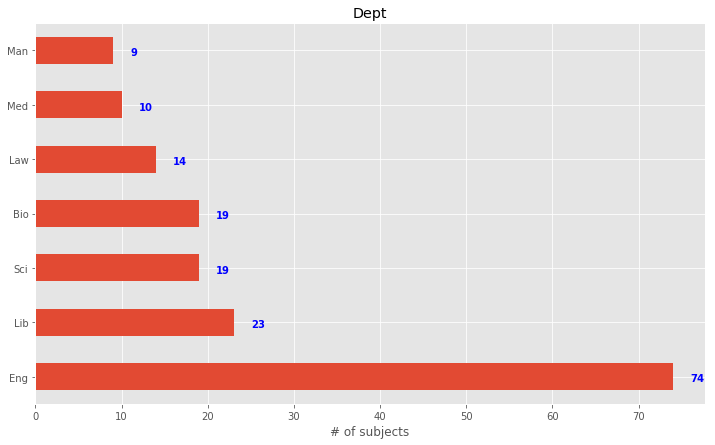

In [17]:
matplotlib.style.use('ggplot')
plt.figure(figsize=(12,7))
feature.Dept.value_counts().plot(kind='barh', width=0.5)
plt.title('Dept')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Dept.value_counts()):
	plt.text(v + 2, i - 0.09, str(v), color='blue', fontweight='bold')

abbr. | dept
----- | ----------------
Man   | 管理學院
Med   | 醫學院 / 公衛學院
Law   | 社科院 / 法學院
Bio   | 生科院 / 生農學院
Sci   | 理學院
Lib   | 文學院
Eng   | 工學院 / 電資院


In [16]:
feature.Sex.value_counts()

Male      104
Female     63
Other       1
Name: Sex, dtype: int64

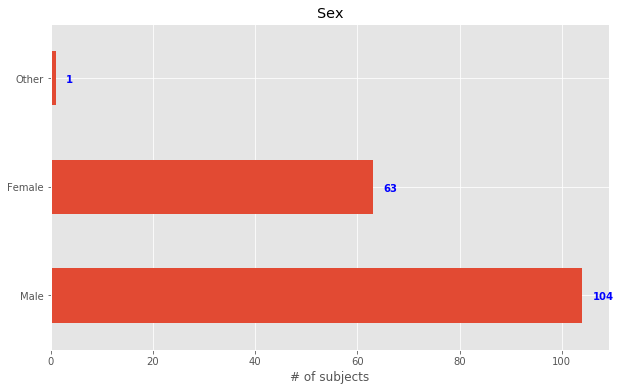

In [18]:
plt.figure(figsize=(10,6))
feature.Sex.value_counts().plot(kind='barh', width=0.5)
plt.title('Sex')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Sex.value_counts()):
	plt.text(v + 2, i - 0.04, str(v), color='blue', fontweight='bold')

In [19]:
feature.Home.value_counts()

North     90
Middle    50
South     25
East       3
Name: Home, dtype: int64

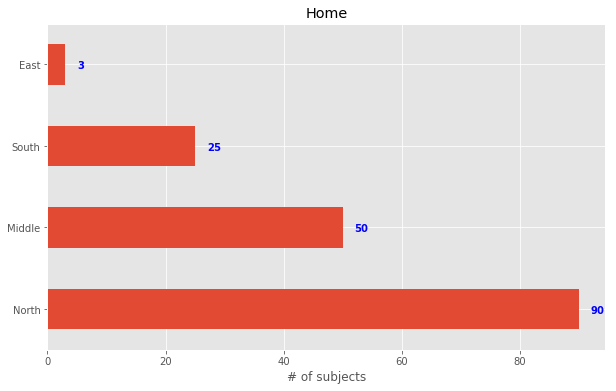

In [20]:
plt.figure(figsize=(10,6))
feature.Home.value_counts().plot(kind='barh', width=0.5)
plt.title('Home')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.Home.value_counts()):
	plt.text(v + 2, i - 0.05, str(v), color='blue', fontweight='bold')

In [21]:
feature.GPA.value_counts()

3.0    87
4.0    31
2.0    21
0.0     7
1.0     5
Name: GPA, dtype: int64

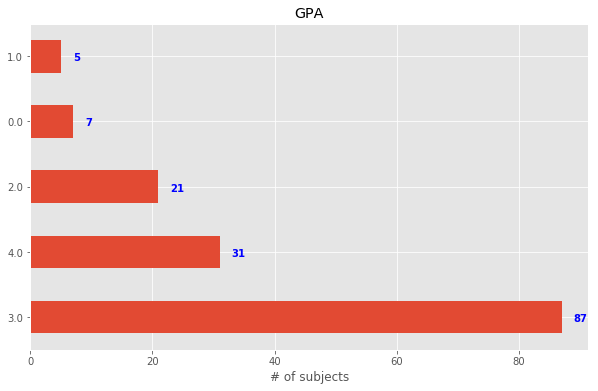

In [22]:
plt.figure(figsize=(10,6))
feature.GPA.value_counts().plot(kind='barh', width=0.5)
plt.title('GPA')
plt.xlabel('# of subjects')
for i, v in enumerate(feature.GPA.value_counts()):
	plt.text(v + 2, i - 0.065, str(v), color='blue', fontweight='bold')

abbr. | GPA        | percentage
----- | ---------- | -----------
  0   | 0 ~ 1.7    |    - 60
  1   | 1.7 ~ 2.3  | 60 - 69
  2   | 2.3 ~ 3.3  | 69 - 79
  3   | 3.3 ~ 4.0  | 79 - 89
  4   | 4.0 ~ 4.3  | 89 -

In [23]:
feature.ix[:, 'a3':'d7'].describe()

,a3,a5,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.262299,4.889138,6.964949,3.027077,4.868097,6.922528,2.971004,4.882399,6.818683,2.918775,4.858048,6.918381
std,4.439371,0.687127,1.597777,0.680172,0.635542,0.881438,0.459517,0.596982,0.869307,0.532784,0.667504,1.113114
min,0.078000,0.121295,0.140605,0.140555,0.079855,0.099175,0.110160,0.099185,0.118500,0.101905,0.137820,0.053920
25%,2.783000,4.657269,6.535153,2.748644,4.596261,6.604766,2.778260,4.624043,6.491501,2.705636,4.607348,6.546899
50%,2.969410,4.933525,6.900635,2.986485,4.885267,6.960463,2.979000,4.871913,6.830343,2.946780,4.910103,7.008483
75%,3.159820,5.221226,7.289250,3.259250,5.162563,7.229110,3.220941,5.185282,7.221692,3.136363,5.158484,7.484394
max,60.159000,6.368000,24.065000,9.676110,6.400235,9.151890,4.175175,6.798185,9.644950,5.111800,6.369000,10.229265


---------------------------------------
<br>
<br>
## Data processing

In [26]:
real = np.array([3,5,7]*4)
dirty = np.round(0.05*feature.shape[0]).astype("int") + 1

Drop 5% of each feature (from 'a3' to 'd7').

In [27]:
for i, ft in enumerate(header[-12:]):
	raw = feature[ft].values
	raw = np.abs(raw - real[i])
	raw.sort()
	bound = raw[-dirty]
	feature.loc[ (feature[ft] > real[i] + bound) | (feature[ft] < real[i] - bound) , ft ] = np.nan

In [28]:
feature.ix[:, 'a3':'d7'].describe()

,a3,a5,a7,b3,b5,b7,c3,c5,c7,d3,d5,d7
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2.972465,4.944133,6.914260,2.989669,4.903942,6.930518,2.992859,4.909034,6.875158,2.948272,4.907829,7.060566
std,0.296001,0.426236,0.587195,0.340565,0.440790,0.601353,0.351804,0.387881,0.535512,0.350135,0.401630,0.646224
min,2.212000,4.010000,5.482880,2.189600,3.905995,5.341325,2.066165,4.008940,5.596765,2.159360,3.921000,5.011290
25%,2.800775,4.681501,6.579208,2.754116,4.621134,6.607514,2.791770,4.632019,6.504826,2.738302,4.650549,6.604627
50%,2.976525,4.937060,6.900635,2.983600,4.893622,6.958810,2.981500,4.877458,6.833843,2.950900,4.911270,7.024798
75%,3.159820,5.212397,7.280899,3.248089,5.160437,7.187989,3.216328,5.176740,7.204250,3.129032,5.150000,7.490813
max,3.665425,6.124695,8.600410,3.823910,6.111230,8.665655,3.925220,5.847000,8.271000,3.947000,6.070150,8.943540
